In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


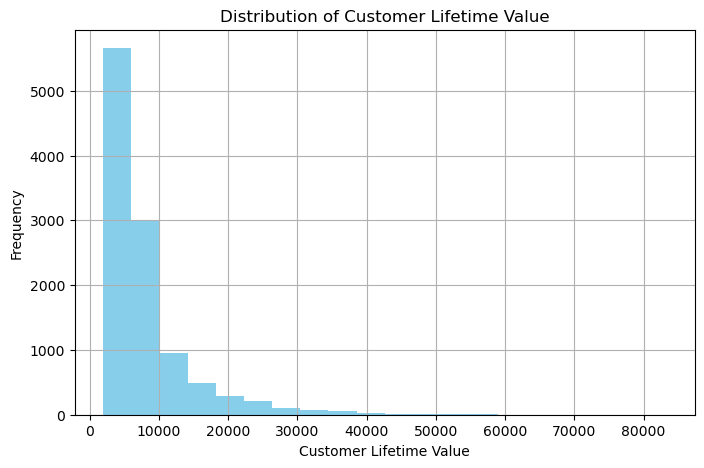

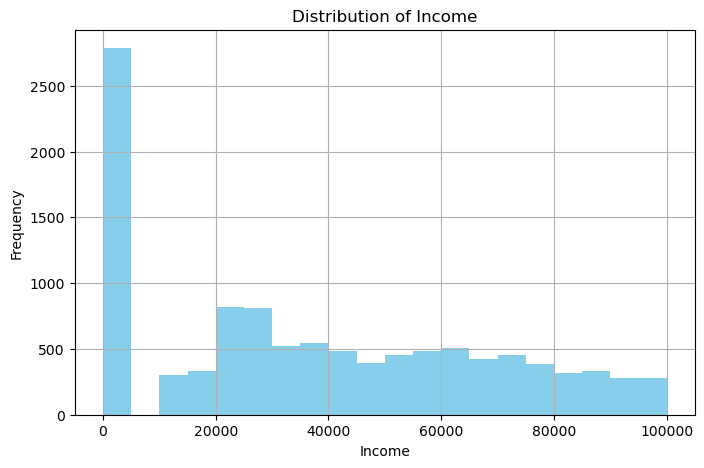

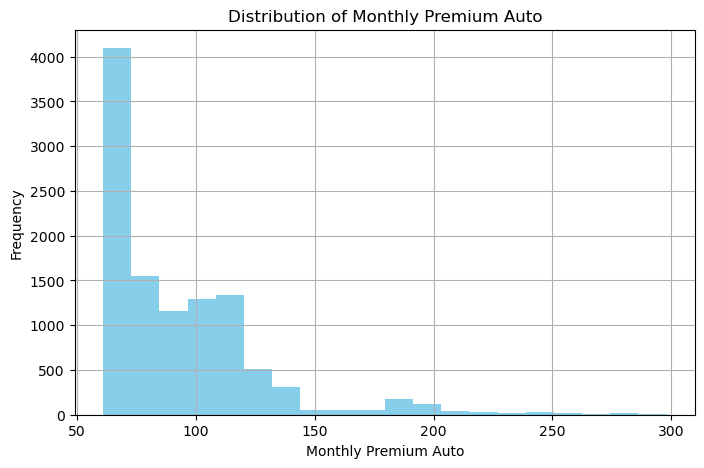

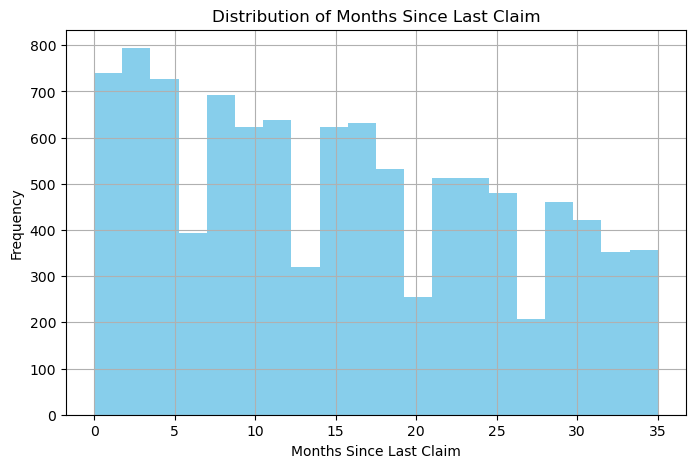

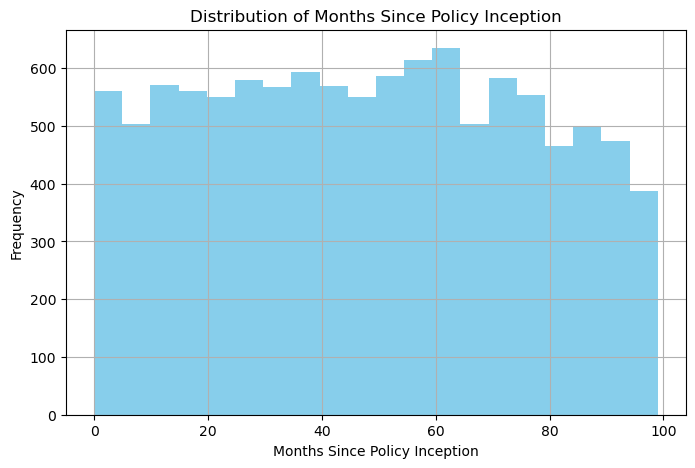

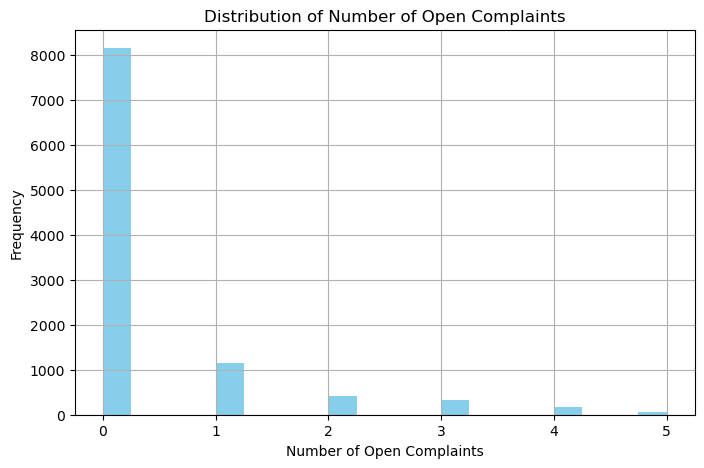

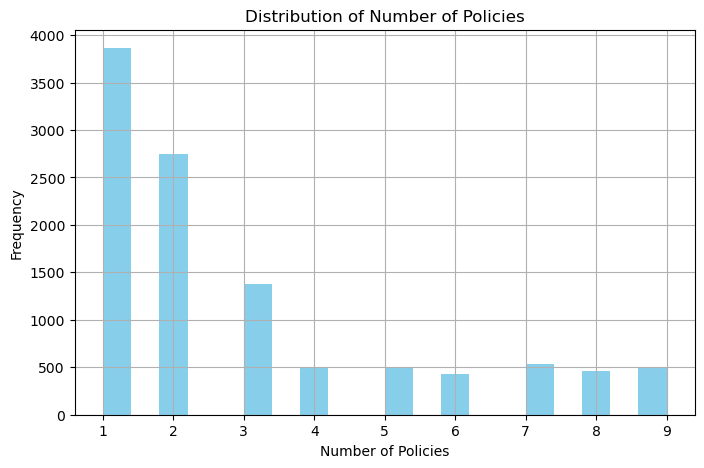

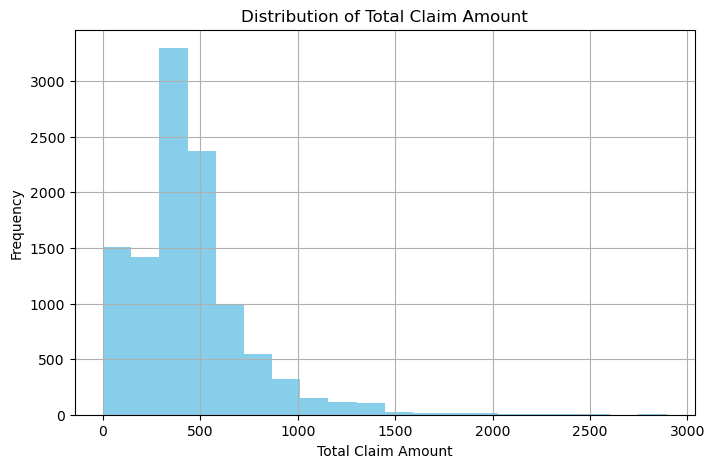

In [58]:

data = pd.read_csv('Data/marketing_customer_analysis.csv')
data.drop(columns="Unnamed: 0", inplace=True)

numerical_columns = data.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [59]:
numerical = data.select_dtypes(np.number)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [60]:
nulls = pd.DataFrame(numerical.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)



,column_name,Percentage Null Values
3,Months Since Last Claim,0.05802
5,Number of Open Complaints,0.05802
0,Customer Lifetime Value,0.00000
1,Income,0.00000
2,Monthly Premium Auto,0.00000
4,Months Since Policy Inception,0.00000
6,Number of Policies,0.00000
7,Total Claim Amount,0.00000


In [61]:
for column in numerical.columns:
    if numerical[column].isna().sum() > 0:
        min_val = numerical[column].min()
        max_val = numerical[column].max()
        size = numerical[column].isna().sum()
        random_values = np.random.randint(min_val, max_val, size=size)
        # for value in numerical[column]:
            # if value.isna():
                # new_value = np.random.randint(min_val, max_val, size=1)
                # numerical[numerical[column] == value] = new_value
        #otro for loop iterando por columna.isna e ir sustituyendo ese valor por un random value
        # probar si fillna te permite sustituir por un random
        # numerical[column][numerical[column].isna()] = random_values
        numerical.loc[numerical[column].isna(), column] = random_values

nulls = pd.DataFrame(numerical.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)


,column_name,Percentage Null Values
0,Customer Lifetime Value,0.0
1,Income,0.0
2,Monthly Premium Auto,0.0
3,Months Since Last Claim,0.0
4,Months Since Policy Inception,0.0
5,Number of Open Complaints,0.0
6,Number of Policies,0.0
7,Total Claim Amount,0.0


In [62]:
numerical["Total Claim Amount"][numerical["Total Claim Amount"].isna()]

Series([], Name: Total Claim Amount, dtype: float64)

In [63]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        10910 non-null  float64
 1   Income                         10910 non-null  int64  
 2   Monthly Premium Auto           10910 non-null  int64  
 3   Months Since Last Claim        10910 non-null  float64
 4   Months Since Policy Inception  10910 non-null  int64  
 5   Number of Open Complaints      10910 non-null  float64
 6   Number of Policies             10910 non-null  int64  
 7   Total Claim Amount             10910 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 682.0 KB


In [64]:
def apply_log(df):
    for column in df.columns:
        df[column] = np.log(df[column] + 1) 
        return df

numerical = apply_log(numerical)

def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outlier_mask = ((df < lower_bound) | (df > upper_bound))
    
    df_no_outliers = df.mask(outlier_mask)
    
    return df_no_outliers


numerical = remove_outliers(numerical)


def normalize_df(df):
    scaler = MinMaxScaler()
    
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    return df_normalized

numerical = normalize_df(numerical)




In [65]:
for column in numerical.columns:
    nulls_colu = numerical[column].isna().sum()
    print(f"{column} tiene {nulls_colu} valores nulos")



Customer Lifetime Value tiene 218 valores nulos
Income tiene 0 valores nulos
Monthly Premium Auto tiene 517 valores nulos
Months Since Last Claim tiene 0 valores nulos
Months Since Policy Inception tiene 0 valores nulos
Number of Open Complaints tiene 2619 valores nulos
Number of Policies tiene 505 valores nulos
Total Claim Amount tiene 556 valores nulos


In [66]:
for column in numerical.columns:
    nulls_colu = numerical[column].isna().sum()
    print(f"{column} tiene {nulls_colu} valores nulos")
    if nulls_colu > 0:
        numerical[column].fillna(numerical[column].mean(), inplace=True)



for column in numerical.columns:
    nulls_colu = numerical[column].isna().sum()
    if nulls_colu > 1:
        print(f"{column} tiene {nulls_colu} valores nulos")


Customer Lifetime Value tiene 218 valores nulos
Income tiene 0 valores nulos
Monthly Premium Auto tiene 517 valores nulos
Months Since Last Claim tiene 0 valores nulos
Months Since Policy Inception tiene 0 valores nulos
Number of Open Complaints tiene 2619 valores nulos
Number of Policies tiene 505 valores nulos
Total Claim Amount tiene 556 valores nulos


In [68]:
X = numerical.drop(columns="Customer Lifetime Value")
y = numerical["Customer Lifetime Value"]
X_sm = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y, test_size=0.2, random_state=42)

model_sm = sm.OLS(y_train, X_train).fit()

y_pred_sm = model_sm.predict(X_test)

print(model_sm.summary())


                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.192
Model:                                 OLS   Adj. R-squared:                  0.191
Method:                      Least Squares   F-statistic:                     344.5
Date:                     Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                             10:10:46   Log-Likelihood:                 1890.9
No. Observations:                     8728   AIC:                            -3768.
Df Residuals:                         8721   BIC:                            -3718.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_sk = LinearRegression()
model_sk.fit(X_train, y_train)


y_pred_sk = model_sk.predict(X_test)


mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print(f'Mean Squared Error (Sklearn): {mse_sk}')
print(f'R^2 Score (Sklearn): {r2_sk}')


Mean Squared Error (Sklearn): 0.03914270813945471
R^2 Score (Sklearn): 0.17788545528543698


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [71]:
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

model_sm_scaled = sm.OLS(y_train, X_train_scaled_sm).fit()

y_pred_sm_scaled = model_sm_scaled.predict(X_test_scaled_sm)

print(model_sm_scaled.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.192
Model:                                 OLS   Adj. R-squared:                  0.191
Method:                      Least Squares   F-statistic:                     344.5
Date:                     Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                             10:11:47   Log-Likelihood:                 1890.9
No. Observations:                     8728   AIC:                            -3768.
Df Residuals:                         8721   BIC:                            -3718.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [72]:
model_sk_scaled = LinearRegression()
model_sk_scaled.fit(X_train_scaled, y_train)

y_pred_sk_scaled = model_sk_scaled.predict(X_test_scaled)

mse_sk_scaled = mean_squared_error(y_test, y_pred_sk_scaled)
r2_sk_scaled = r2_score(y_test, y_pred_sk_scaled)

print(f'Mean Squared Error (Sklearn Scaled): {mse_sk_scaled}')
print(f'R^2 Score (Sklearn Scaled): {r2_sk_scaled}')


Mean Squared Error (Sklearn Scaled): 0.0391427081394547
R^2 Score (Sklearn Scaled): 0.1778854552854371
